In [15]:
import pandas as pd
df=pd.read_csv(r"C:\Users\DELL\email-spam-detection\spam.csv",encoding="latin-1")

In [16]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [17]:
df.shape

(5572, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [19]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [20]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(403)

In [22]:
df=df.drop_duplicates(keep="first")

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.shape

(5169, 2)

In [25]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6496\3235267346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"v1":"target","v2":"text"},inplace=True)


In [26]:
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [27]:
# here the class is imbalanced
df["target"].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

In [28]:
import plotly.express as px

target_counts = df["target"].value_counts().reset_index()
fig = px.pie(target_counts, names='target', values='count', title='Target Class Distribution',hole=0.2)
fig.update_layout(
    width = 350,
    height =400
)
fig.show()


In [29]:
df.head(4)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


In [30]:
import nltk
nltk.download('punkt')  # This is for word and sentence tokenization.
nltk.download('punkt_tab')  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
df["num_char"]=df["text"].apply(len)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6496\2998575865.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
from nltk.tokenize import word_tokenize
df["num_of_words"]=df["text"].apply(lambda x: len(word_tokenize(x)))

C:\Users\DELL\AppData\Local\Temp\ipykernel_6496\2796246034.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df.head(3)

,target,text,num_char,num_of_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [34]:
from nltk.tokenize import sent_tokenize
df["num_of_sent"]=df["text"].apply(lambda x: len(sent_tokenize(x)))

C:\Users\DELL\AppData\Local\Temp\ipykernel_6496\2760002070.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
df

,target,text,num_char,num_of_words,num_of_sent
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["target"]=le.fit_transform(df["target"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_6496\4225924073.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
df 
# 0 ham and 1 spam

,target,text,num_char,num_of_words,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [38]:
ham_class=df[df["target"]==0][["num_of_words","num_of_sent","num_char"]]
spam_class=df[df["target"]==1][["num_of_words","num_of_sent","num_char"]]


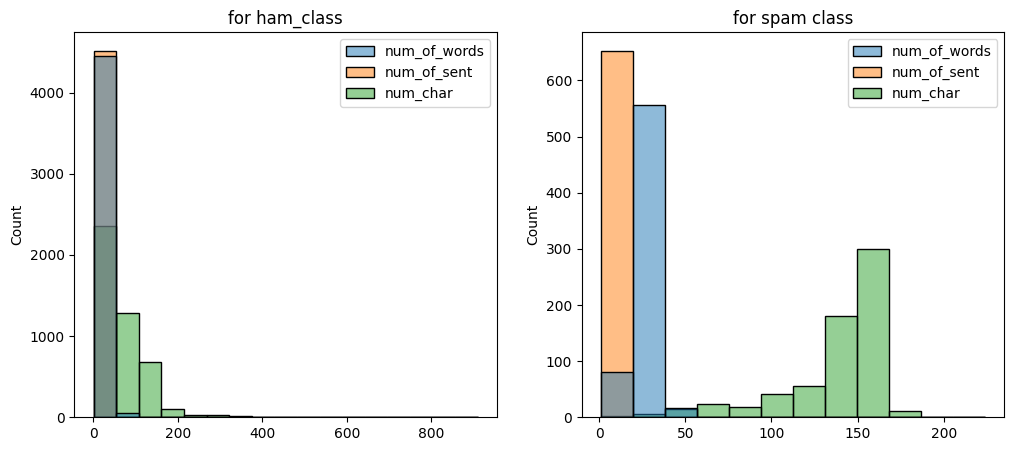

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
fig ,ax =plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=ham_class,ax=ax[0],bins=17)
ax[0].set_title("for ham_class")
sns.histplot(spam_class,ax=ax[1])
ax[1].set_title("for spam class")
plt.show()

<Axes: xlabel='num_of_words', ylabel='Count'>

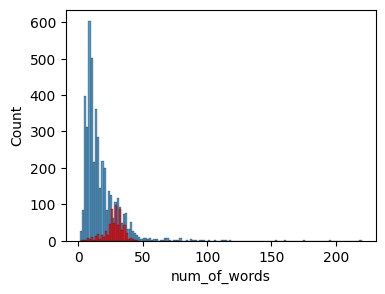

In [40]:
plt.subplots(figsize=(4,3))
sns.histplot(df[df["target"]==0],x="num_of_words") # for ham
sns.histplot(df[df["target"]==1],x="num_of_words",color="red") #for spam

<Axes: xlabel='num_char', ylabel='Count'>

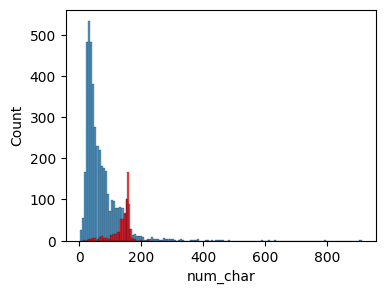

In [41]:
plt.subplots(figsize=(4,3))
sns.histplot(df[df["target"]==0],x="num_char") # for ham
sns.histplot(df[df["target"]==1],x="num_char",color="red") #for spam

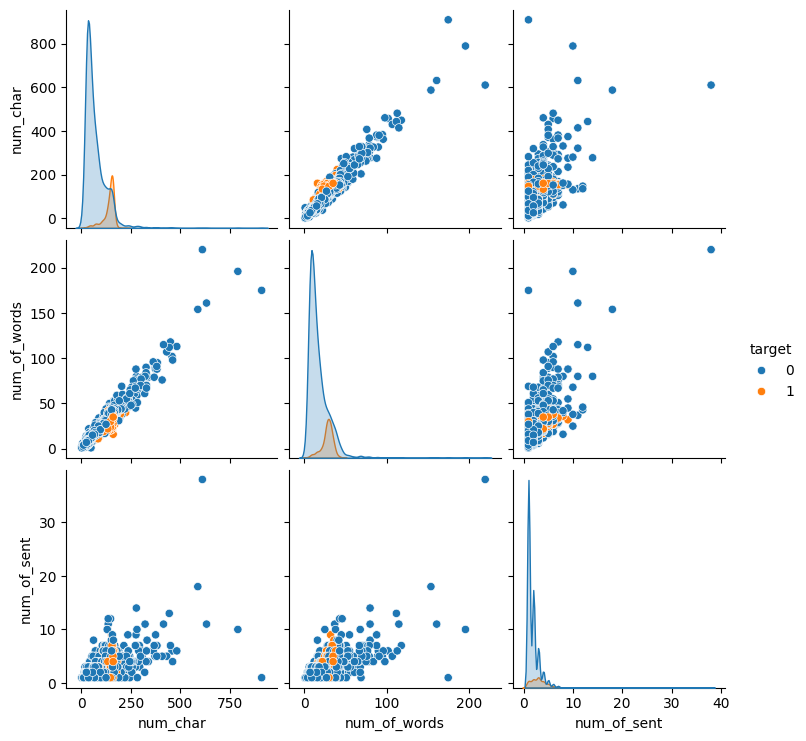

In [42]:

sns.pairplot(df,hue="target")

In [43]:
df.columns

Index(['target', 'text', 'num_char', 'num_of_words', 'num_of_sent'], dtype='object')

<Axes: >

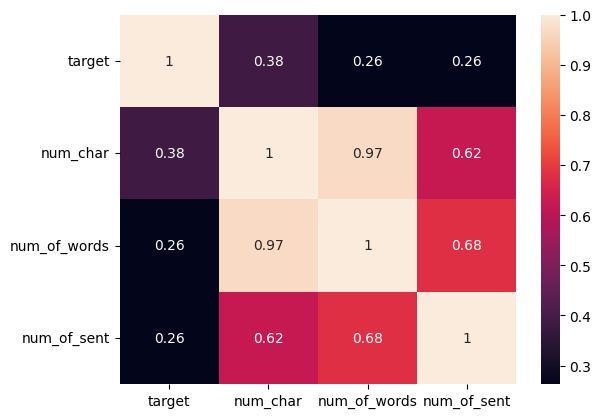

In [44]:
import pandas as pd
num_df=df.drop("text",axis=1)
sns.heatmap(num_df.corr(),annot=True)
# here we can take num_char cuz of high corr than other column with target

In [45]:
df.sample(4)

,target,text,num_char,num_of_words,num_of_sent
3688,0,You still coming tonight?,25,5,1
3220,1,"Thanks for your ringtone order, reference numb...",157,27,3
2375,0,Thanx 4 2day! U r a goodmate I THINK UR RITE S...,95,25,4
5083,0,Aiya we discuss later lar... Pick Ì_ up at 4 i...,51,14,2


In [46]:
df.drop(columns=["num_of_words","num_of_sent"],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6496\160359869.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
import nltk
import string
import pandas as pd
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in tokens]
    
    #  Join back to string
    return " ".join(stemmed)


In [49]:
df["text"]=df["text"].apply(lambda x:clean_text(x))

C:\Users\DELL\AppData\Local\Temp\ipykernel_6496\654313331.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
shortcuts = {
    'u': 'you',
    'r': 'are',
    'ur': 'your',
    'btw': 'by the way',
    'omg': 'oh my god',
    'idk': "I don't know",
    'brb': 'be right back',
    'lol': 'laughing out loud',
    'asap': 'as soon as possible',
    'ttyl': 'talk to you later',
    'gr8': 'great',
    'b4': 'before',
    'l8r': 'later',
    'bcoz': 'because',
    'plz': 'please',
    'thx': 'thanks',
    'tnx': 'thanks',
    'np': 'no problem',
    'k': 'okay',
    'ok': 'okay',
    'msg': 'message',
    'txt': 'text',
    'cya': 'see you',
    'dm': 'direct message',
    'fyi': 'for your information',
    'atm': 'at the moment',
    'imo': 'in my opinion',
    'jk': 'just kidding',
    'nvm': 'never mind',
    'rofl': 'rolling on the floor laughing',
    'ya': 'yeah',
    'thx': 'thanks',
    'gn': 'good night',
    'gm': 'good morning',
    'tc': 'take care'
}

def shortcut_conv(text):
    text=text.split( )
    return " ".join([shortcuts.get(word.lower() , word) for word in text ])

In [51]:
df["text"]=df["text"].apply(lambda x: shortcut_conv(x))

C:\Users\DELL\AppData\Local\Temp\ipykernel_6496\2887979338.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



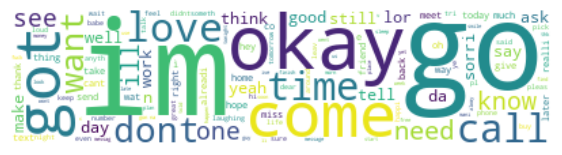

In [52]:
from wordcloud import WordCloud
text=df[df["target"] == 0]["text"].str.cat(sep=" ")
wc=WordCloud(width=400,height=100,background_color="white").generate(text)
plt.figure(figsize=(7,5))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

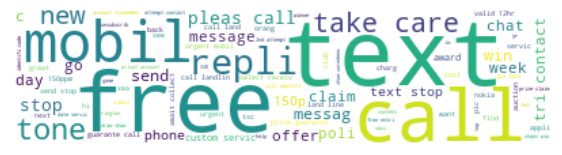

In [53]:
from wordcloud import WordCloud
text=df[df["target"] == 1]["text"].str.cat(sep=" ")
wc=WordCloud(width=400,height=100,background_color="white").generate(text)
plt.figure(figsize=(7,5))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

In [54]:
spam_corpus=[]
for msg in df[df["target"]==1]["text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 321),
 ('text', 258),
 ('free', 189),
 ('2', 155),
 ('you', 123),
 ('your', 121),
 ('mobil', 114),
 ('stop', 103),
 ('repli', 100),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('tone', 62),
 ('take', 60),
 ('send', 59),
 ('urgent', 58),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('care', 50),
 ('pleas', 50),
 ('week', 49),
 ('win', 48),
 ('collect', 44),
 ('min', 44)]

In [56]:
spam_df=pd.DataFrame(Counter(spam_corpus).most_common(30))

In [57]:
spam_df.head()

,0,1
0,call,321
1,text,258
2,free,189
3,2,155
4,you,123


In [58]:

import plotly.express as px
fig=px.bar(spam_df,x=0,y=1,title="for_spam")
fig.update_layout(width=550,height=350)
fig.show()

In [59]:
ham_corpus=[]
for msg in df[df["target"]==0]["text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
from collections import Counter
Counter(ham_corpus).most_common(30)
ham_df=pd.DataFrame(Counter(ham_corpus).most_common(30))


In [61]:
ham_df.head()

,0,1
0,you,884
1,im,435
2,go,401
3,get,352
4,okay,340


In [62]:
import plotly.express as px
fig=px.bar(ham_df,x=0,y=1,title="for_ham")
fig.update_layout(width=550,height=350)
fig.show()

In [63]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vec=TfidfVectorizer(max_features=3500)
x=vec.fit_transform(df["text"]).toarray()



In [64]:
x.shape

(5169, 3500)

In [65]:
y=df["target"].values

In [66]:
# x=pd.DataFrame(vectorized,columns=vec.get_feature_names_out()).sample(5)

In [ ]:
from sklearn.model_selection import train_test_split
import mlflow
import os
import dagshub
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
dagshub_token=os.getenv("DAGSHUB_PAT")
if not dagshub_token:
    raise EnvironmentError("dagshub enviroment is not set ")
os.environ["MLFLOW_TRACKING_USERNAME"]=dagshub_token
os.environ["MLFLOW_TRACKING_PASSWORD"]=dagshub_token


url="https://dagshub.com"
username="DataShoaib" 
repo_name="end-to-end-industry-level-email-spam-detection"

mlflow.set_tracking_uri(f"{url}/{username}/{repo_name}")

mlflow.set_experiment("multiple experiment for best model")
with mlflow.start_run(run_name="base_line_model"):
    lr=LogisticRegression(max_iter=200,solver="liblinear",random_state=42,)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt=".2f",)
    plt.title("confusion_matrix")
    plt.savefig("reports/confusion_matrix.png")
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    mlflow.log_metrics({"accuracy":accuracy,"precison":precision})
    mlflow.log_params({"max_iter":200,"solver":"liblinear","random_state":42})
    mlflow.log_artifact(__file__)
    
    mlflow.sklearn.log_model(lr,"LogisticRegression")
    mlflow.log_artifact("reports/confusion_matrix.png")
    mlflow.set_tag("author","shoiab")

OSError: dagshub enviroment is not set 

In [ ]:
# 5d19c1a207823f9789cf49887da38c17db58efbc